In [1]:
`import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

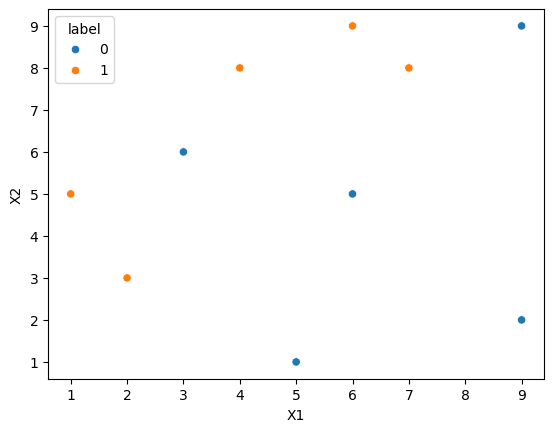

In [5]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

##### Step - 1 : Sample weights assign

In [6]:
df['weights'] = 1/len(df)

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


##### Step - 2 : Creating Decision Tree stump

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)


In [9]:
X = df.drop(columns='label',axis=1)
y = df['label']

In [10]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

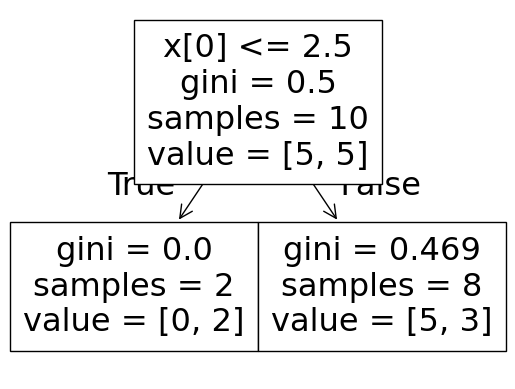

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1);

In [12]:
df['y_pred'] = dt1.predict(X)

In [13]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


# 3 errors have been found, so the sum of TE = 0.1 + 0.1 + 0.1 = 0.3

##### Step - 3 : calculate performance of stump

In [14]:
def calculate_model_weight(TE):
    return 0.5 * np.log((1-TE)/TE)
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

##### Step - 4 : Update weights

In [15]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
        
    

In [16]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [17]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


##### Step - 5 : Normalized Weights

In [18]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [19]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [20]:
df['normalized_weights'].sum()

1.0

In [21]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']


In [22]:
df[['X1','X2','label','weights','updated_weights','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0.065508,0.071475,0.928525,1.000000


In [24]:
df.iterrows

<bound method DataFrame.iterrows of    X1  X2  label  weights  y_pred  updated_weights  normalized_weights  \
0   1   5      1      0.1       1         0.065508            0.071475   
1   2   3      1      0.1       1         0.065508            0.071475   
2   3   6      0      0.1       0         0.065508            0.071475   
3   4   8      1      0.1       0         0.152653            0.166559   
4   5   1      0      0.1       0         0.065508            0.071475   
5   6   9      1      0.1       0         0.152653            0.166559   
6   6   5      0      0.1       0         0.065508            0.071475   
7   7   8      1      0.1       0         0.152653            0.166559   
8   9   9      0      0.1       0         0.065508            0.071475   
9   9   2      0      0.1       0         0.065508            0.071475   

   cumsum_upper  cumsum_lower  
0      0.071475      0.000000  
1      0.142950      0.071475  
2      0.214425      0.142950  
3      0.380983      

In [28]:
def bin_assignment(dataset):
    indices = []
    for i in range(len(df)):
        a = np.random.random()
        for index,row in dataset.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [29]:
index = bin_assignment(df)

In [30]:
index

[3, 3, 5, 5, 3, 7, 7, 7, 2, 3]

In [48]:
second_df = df.iloc[index,[0,1,2,3]]

In [49]:
second_df

,X1,X2,label,weights
3,4,8,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1


In [50]:
dt2 = DecisionTreeClassifier(max_depth=1)
x = second_df.drop(columns='label',axis=1)
y = second_df['label']
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 3.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.625, 0.5, '  False')]

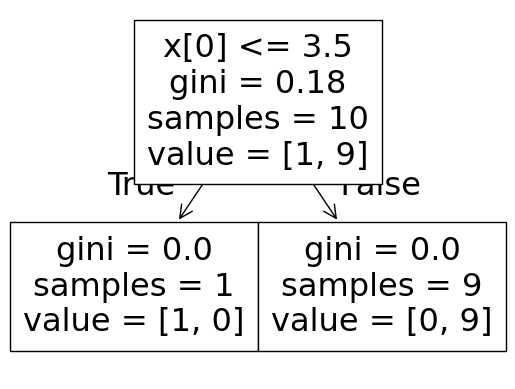

In [51]:
plot_tree(dt2)

In [52]:
second_df['y_pred'] = dt2.predict(x)

In [53]:
second_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,1


In [61]:
query = np.array([1,5,0.1]).reshape(1,3)

In [62]:
query

array([[1. , 5. , 0.1]])

In [63]:
x.shape

(10, 3)

In [64]:
query.shape

(1, 3)

In [65]:
dt1.predict(query)

C:\Users\saha7\miniconda3\envs\profiling_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [66]:
dt2.predict(query)

C:\Users\saha7\miniconda3\envs\profiling_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)